## Assignment 3a: Task 1: Pattern mining

### Parth Kumar, a1930974, Final Version




### DATA PRE-PROCESSING

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
df_groceries=pd.read_csv("Groceries data train.csv")
df_groceries

,User_id,Date,itemDescription,year,month,day,day_of_week
0,2351.0,1/01/2014,cleaner,2014.0,1.0,1.0,2.0
1,2226.0,1/01/2014,sausage,2014.0,1.0,1.0,2.0
2,1922.0,1/01/2014,tropical fruit,2014.0,1.0,1.0,2.0
3,2943.0,1/01/2014,whole milk,2014.0,1.0,1.0,2.0
4,1249.0,1/01/2014,citrus fruit,2014.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...
26980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26983,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_groceries_train = df_groceries.iloc[:19382].copy()
df_groceries_train

,User_id,Date,itemDescription,year,month,day,day_of_week
0,2351.0,1/01/2014,cleaner,2014.0,1.0,1.0,2.0
1,2226.0,1/01/2014,sausage,2014.0,1.0,1.0,2.0
2,1922.0,1/01/2014,tropical fruit,2014.0,1.0,1.0,2.0
3,2943.0,1/01/2014,whole milk,2014.0,1.0,1.0,2.0
4,1249.0,1/01/2014,citrus fruit,2014.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...
19377,3575.0,20/01/2015,bottled water,2015.0,1.0,20.0,1.0
19378,2075.0,20/01/2015,root vegetables,2015.0,1.0,20.0,1.0
19379,3797.0,20/01/2015,cream,2015.0,1.0,20.0,1.0
19380,4390.0,20/01/2015,coffee,2015.0,1.0,20.0,1.0


In [6]:
df_groceries_train.dtypes

User_id            float64
Date                object
itemDescription     object
year               float64
month              float64
day                float64
day_of_week        float64
dtype: object

In [7]:
df_groceries_train['User_id'] = df_groceries_train['User_id'].astype(int)
df_groceries_train['year'] = df_groceries_train['year'].astype(int)
df_groceries_train['month'] = df_groceries_train['month'].astype(int)
df_groceries_train['day'] = df_groceries_train['day'].astype(int)
df_groceries_train['day_of_week'] = df_groceries_train['day_of_week'].astype(int)
df_groceries_train["Date"] = pd.to_datetime(df_groceries_train["Date"], dayfirst=True, errors="coerce")

In [8]:
df_groceries_train.isna().sum()

User_id            0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [9]:
df_groceries_train['itemDescription'] = df_groceries_train['itemDescription'].str.lower().str.strip()
df_groceries_train['TransactionID'] = (
    df_groceries_train['User_id'].astype(int).astype(str) + 
    '_' + 
    df_groceries_train['Date'].dt.strftime('%Y-%m-%d')
)

df_groceries_train

,User_id,Date,itemDescription,year,month,day,day_of_week,TransactionID
0,2351,2014-01-01,cleaner,2014,1,1,2,2351_2014-01-01
1,2226,2014-01-01,sausage,2014,1,1,2,2226_2014-01-01
2,1922,2014-01-01,tropical fruit,2014,1,1,2,1922_2014-01-01
3,2943,2014-01-01,whole milk,2014,1,1,2,2943_2014-01-01
4,1249,2014-01-01,citrus fruit,2014,1,1,2,1249_2014-01-01
...,...,...,...,...,...,...,...,...
19377,3575,2015-01-20,bottled water,2015,1,20,1,3575_2015-01-20
19378,2075,2015-01-20,root vegetables,2015,1,20,1,2075_2015-01-20
19379,3797,2015-01-20,cream,2015,1,20,1,3797_2015-01-20
19380,4390,2015-01-20,coffee,2015,1,20,1,4390_2015-01-20


In [10]:
transactions_train = df_groceries_train.groupby('TransactionID')['itemDescription'].apply(list).tolist()
len(transactions_train), transactions_train[:5]

(8361,
 [['whole milk', 'pastry', 'salty snack'],
  ['sausage', 'whole milk', 'rolls/buns'],
  ['whole milk', 'soda'],
  ['frankfurter', 'soda'],
  ['butter', 'whole milk']])

/var/folders/x7/xrth4_p955x331lrb98xvffh0000gn/T/ipykernel_75677/2011120355.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')


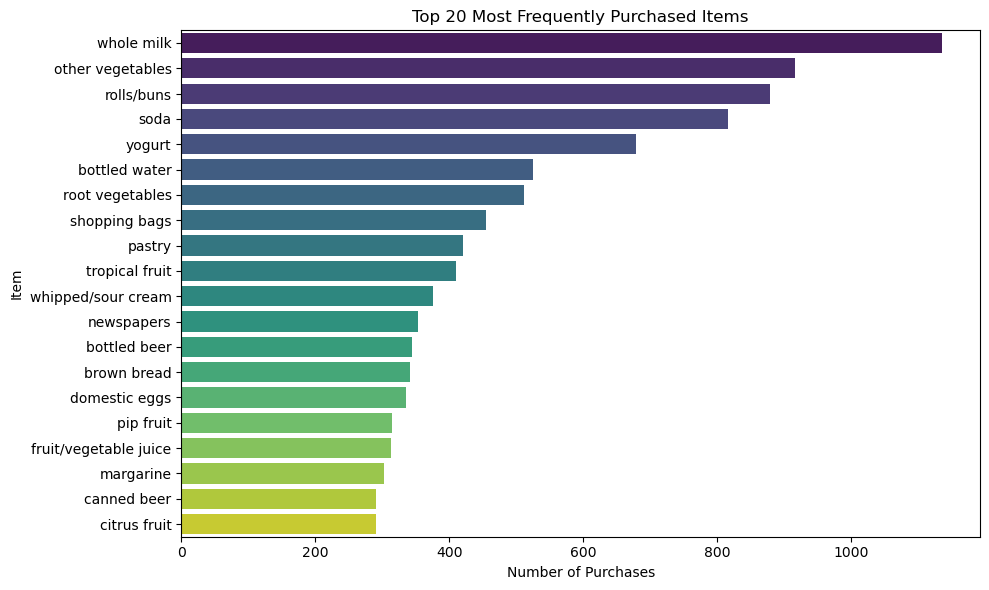

In [11]:
item_counts = df_groceries_train['itemDescription'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')
plt.title("Top 20 Most Frequently Purchased Items")
plt.xlabel("Number of Purchases")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

Whole milk, other vegetables, and rolls/buns are the most bought items.

This tells us these items might appear frequently in patterns — so we might want to set a 
support threshold below their frequency to catch more subtle patterns.

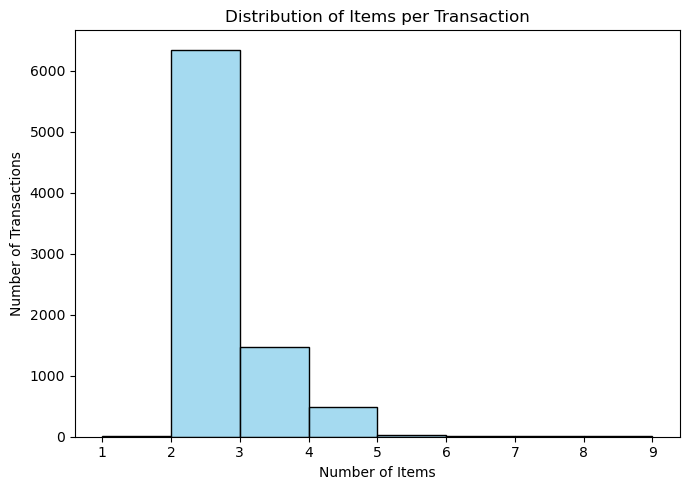

In [13]:
transaction_lengths = [len(t) for t in transactions_train]


plt.figure(figsize=(7, 5))
sns.histplot(transaction_lengths, bins=range(1, max(transaction_lengths)+1), kde=False, color='skyblue')
plt.title("Distribution of Items per Transaction")
plt.xlabel("Number of Items")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()


Most transactions contain 1 to 4 items.

Very few transactions go beyond 6 items.

This shows that many users buy just a few things, which may lead to short patterns.

### Pattern Mining

In [16]:
transactions_train = df_groceries_train.groupby('TransactionID')['itemDescription'].apply(list).tolist()
len(transactions_train), transactions_train[:5]

(8361,
 [['whole milk', 'pastry', 'salty snack'],
  ['sausage', 'whole milk', 'rolls/buns'],
  ['whole milk', 'soda'],
  ['frankfurter', 'soda'],
  ['butter', 'whole milk']])

In [17]:
te = TransactionEncoder()
te_array = te.fit(transactions_train).transform(transactions_train)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

df_encoded

,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8356,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8357,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8358,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8359,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Count how many transactions contain "whole milk"
count = sum(['whole milk' in t for t in transactions_train])
print("Transactions with whole milk:", count)

Transactions with whole milk: 1091


i took the support =count of whole milk/total number of transcations which was equal to 0.13 but on using that support the frequent itemsets are very bad as i mean that there are very few sometimes even null.

### FP-Growth

We chose FP-Growth over Apriori for the final pipeline due to its better computational efficiency and scalability, even though both algorithms produced the same rule set at the tested thresholds.

To allow for the discovery of both common and less frequent but potentially meaningful patterns, the minimum support was set to 0.001. This ensures that items appearing in as little as 0.1% of transactions are included. The minimum confidence threshold was initially set low at 0.01 to capture a wide set of potential rules, with the intention of applying stricter filters later (confidence > 0.1, lift > 1) to retain only high-quality rules. This two-step approach balances exploration and precision in rule mining(Chris Kimmer 2014).



In [23]:
frequent_itemsets_fp=fpgrowth(df_encoded,min_support=0.001,use_colnames=True)
frequent_itemsets_fp

,support,itemsets
0,0.130487,(whole milk)
1,0.049635,(pastry)
2,0.019615,(salty snack)
3,0.101902,(rolls/buns)
4,0.025715,(sausage)
...,...,...
457,0.001316,"(oil, soda)"
458,0.001435,"(rolls/buns, processed cheese)"
459,0.001076,"(whole milk, misc. beverages)"
460,0.001076,"(rolls/buns, misc. beverages)"


In [24]:
rules_fp=association_rules(frequent_itemsets_fp,metric="confidence",min_threshold=0.01)

rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(pastry),0.130487,0.049635,0.003827,0.029331,0.590929,1.0,-0.002649,0.979082,-0.443249,0.021710,-0.021365,0.053220
1,(pastry),(whole milk),0.049635,0.130487,0.003827,0.077108,0.590929,1.0,-0.002649,0.942162,-0.421432,0.021710,-0.061389,0.053220
2,(root vegetables),(pastry),0.060399,0.049635,0.002392,0.039604,0.797901,1.0,-0.000606,0.989555,-0.212332,0.022222,-0.010555,0.043898
3,(pastry),(root vegetables),0.049635,0.060399,0.002392,0.048193,0.797901,1.0,-0.000606,0.987175,-0.210433,0.022222,-0.012991,0.043898
4,(pastry),(shopping bags),0.049635,0.052745,0.001196,0.024096,0.456848,1.0,-0.001422,0.970644,-0.555754,0.011820,-0.030244,0.023386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,(misc. beverages),(whole milk),0.015429,0.130487,0.001076,0.069767,0.534671,1.0,-0.000937,0.934727,-0.469200,0.007432,-0.069831,0.039008
618,(rolls/buns),(misc. beverages),0.101902,0.015429,0.001076,0.010563,0.684654,1.0,-0.000496,0.995083,-0.338996,0.009259,-0.004942,0.040165
619,(misc. beverages),(rolls/buns),0.015429,0.101902,0.001076,0.069767,0.684654,1.0,-0.000496,0.965456,-0.318712,0.009259,-0.035780,0.040165
620,(rolls/buns),(seasonal products),0.101902,0.007774,0.001076,0.010563,1.358776,1.0,0.000284,1.002819,0.294003,0.009912,0.002811,0.074512


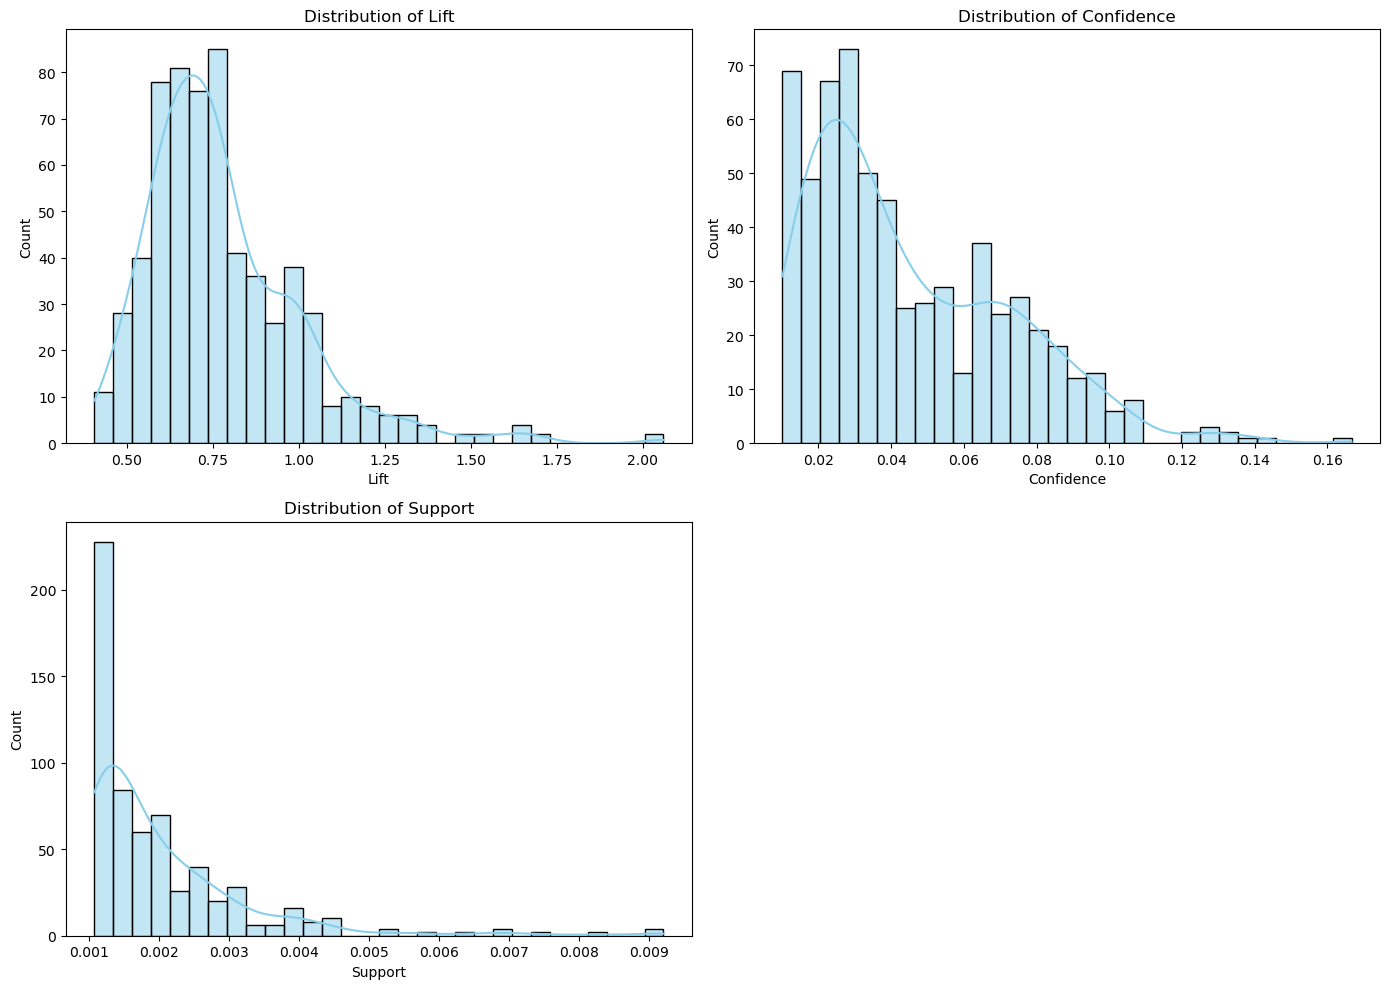

In [25]:
# Select only the 3 metrics (excluding 'score')
metrics_to_plot = ['lift', 'confidence', 'support']


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# Plot the metrics (3 metrics in first 3 subplots)
for i, metric in enumerate(metrics_to_plot):
    sns.histplot(rules_fp[metric], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {metric.capitalize()}')
    axes[i].set_xlabel(metric.capitalize())
    axes[i].set_ylabel('Count')

# Hide the empty fourth plot
axes[-1].axis('off')

plt.tight_layout()
plt.show()


Plot distributions of key rule metrics: lift, confidence, and support
 
Purpose:
- To understand the general spread and skewness of each metric
- To identify outliers or rare patterns in the dataset
- Helps in setting meaningful thresholds for rule filtering later

Interpretation:
- Lift: Most rules cluster around 0.7–1.0 (many random or weak rules), but a few strong rules exist.
- Confidence: Skewed toward lower values; reliable rules are relatively rare.
- Support: Extremely small values; most rules are based on rare itemsets.

This analysis supports later decisions to filter rules based on lift > 1 and confidence > 0.1.


In [27]:
rules_fp = rules_fp[(rules_fp['lift'] > 1) | (rules_fp['confidence'] > 0.1)] #(Raschka, S 2023)
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
19,(rolls/buns),(salty snack),0.101902,0.019615,0.002033,0.019953,1.017241,1.0,0.000034,1.000345,0.018871,0.017017,0.000345,0.061806
20,(salty snack),(rolls/buns),0.019615,0.101902,0.002033,0.103659,1.017241,1.0,0.000034,1.001960,0.017288,0.017017,0.001956,0.061806
25,(root vegetables),(salty snack),0.060399,0.019615,0.001316,0.021782,1.110493,1.0,0.000131,1.002216,0.105895,0.016717,0.002211,0.044428
26,(salty snack),(root vegetables),0.019615,0.060399,0.001316,0.067073,1.110493,1.0,0.000131,1.007154,0.101489,0.016717,0.007103,0.044428
32,(sausage),(whole milk),0.025715,0.130487,0.002751,0.106977,0.819828,1.0,-0.000605,0.973674,-0.184052,0.017927,-0.027038,0.064029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,(pork),(yogurt),0.018778,0.078579,0.001674,0.089172,1.134805,1.0,0.000199,1.011630,0.121065,0.017500,0.011496,0.055240
615,(rolls/buns),(processed cheese),0.101902,0.011482,0.001435,0.014085,1.226673,1.0,0.000265,1.002640,0.205753,0.012821,0.002633,0.069542
616,(processed cheese),(rolls/buns),0.011482,0.101902,0.001435,0.125000,1.226673,1.0,0.000265,1.026398,0.186933,0.012821,0.025719,0.069542
620,(rolls/buns),(seasonal products),0.101902,0.007774,0.001076,0.010563,1.358776,1.0,0.000284,1.002819,0.294003,0.009912,0.002811,0.074512


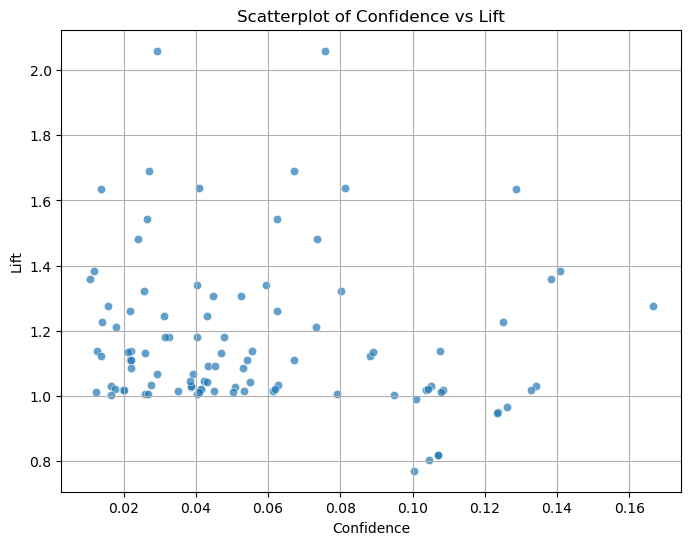

In [28]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=rules_fp, x='confidence', y='lift', alpha=0.7)
plt.title('Scatterplot of Confidence vs Lift')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True)
plt.show()


A scatterplot of confidence versus lift was generated to understand the trade-off between rule reliability and interestingness. The plot revealed that most rules exhibited low confidence and modest lift, while only a few rules achieved high values in both dimensions. This observation justified the application of rule filtering thresholds to retain only high-quality association rules for further recommendation tasks.

In [30]:
# 1. Clean frozensets to readable strings
rules_fp['antecedents'] = rules_fp['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_fp['consequents'] = rules_fp['consequents'].apply(lambda x: ', '.join(list(x)))

# 2. Calculate weighted score (or your normal score)
rules_fp.loc[:, "score"] = rules_fp["confidence"] * rules_fp["lift"] * rules_fp["support"]





/var/folders/x7/xrth4_p955x331lrb98xvffh0000gn/T/ipykernel_75677/3252519189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_fp['antecedents'] = rules_fp['antecedents'].apply(lambda x: ', '.join(list(x)))
/var/folders/x7/xrth4_p955x331lrb98xvffh0000gn/T/ipykernel_75677/3252519189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_fp['consequents'] = rules_fp['consequents'].apply(lambda x: ', '.join(list(x)))
/var/folders/x7/xrth4_p955x331lrb98xvffh0000gn/T/ipykernel_75677/3252519189.py:6: Se

In [31]:
# 3. Sort by score descending and pick Top 100
top_fp = rules_fp.sort_values(by="score", ascending=False).head(100)





/var/folders/x7/xrth4_p955x331lrb98xvffh0000gn/T/ipykernel_75677/3888650815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=antecedent_counts.values, y=antecedent_counts.index, palette='Blues_d')


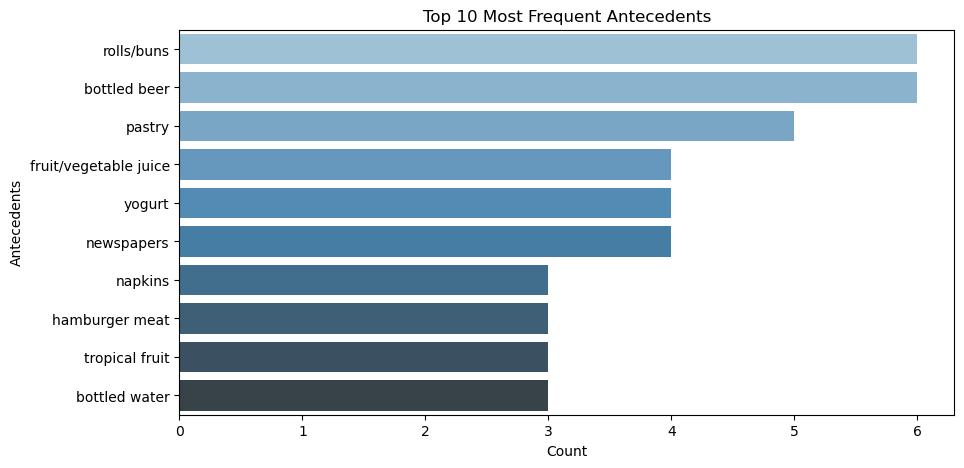

In [32]:
antecedent_counts = rules_fp['antecedents'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=antecedent_counts.values, y=antecedent_counts.index, palette='Blues_d')
plt.title('Top 10 Most Frequent Antecedents')
plt.xlabel('Count')
plt.ylabel('Antecedents')
plt.show()

A barplot of the top 10 most frequent antecedents was generated to understand which products most often initiate association rules. The results indicated that items such as 'rolls/buns' and 'bottled beer' are common drivers of purchasing behavior, providing valuable insights for targeted marketing strategies.

In [34]:
# 3. Sort by score descending and pick Top 100
top_fp = rules_fp.sort_values(by="score", ascending=False).head(100)

# 4. Select only the useful columns
top_fp = top_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'score']]

# 5. Save to CSV
top_fp.to_csv("top_fp.csv", index=False)

# 6. (Optional) Preview
top_fp.head()


,antecedents,consequents,support,confidence,lift,score
582,bottled beer,whole milk,0.005382,0.132743,1.017294,0.000727
50,frankfurter,whole milk,0.002033,0.166667,1.277269,0.000433
166,pip fruit,rolls/buns,0.003947,0.105096,1.031343,0.000428
477,newspapers,whole milk,0.004425,0.106936,0.819519,0.000388
375,fruit/vegetable juice,rolls/buns,0.003708,0.100977,0.990928,0.000371


### 6. Reflection

##### VERSION 1:
1. Here, I have read the CSV file and done the pre-processing, which involved removing the testing part, converting to integer, doing some visualization, and still deciding which algorithm to take (apriori/FPgrowth).
2. Added another transcationID, which could help in the late algorithm development.

##### VERSION 2:
1. I started my pattern mining process by setting the parameters until they worked to determine whether I am in the right direction.
2. I tried the scoring method of just multiplying them together while keeping the confidence very high.
3. I also tried both the algorithms(apriori-fpgrowth).
4. Next i am planning to study somewhat more before I try something new, like including a train/dev split to check it with the ground truth. while determing the scoring metrics to think of maybe weighted one.
5. I took the top 100 to give to task2 so he can start his work too.

##### VERSION 3:
1. I have removed the apriori algorithm and choose fp growth moving forward as i got to know that we had better results with that is task 2.
2. when puting confidence as 10% its making making this generalisation of consequebnts being whole milk, rolls/buns, other vegetables. which doesnt really fit our idea of being expandable like i mean of gettuing more and diverse data. 
3. i reduced the confidence more so that i can get more itemsets. i could add more hyperparameters to get better result and with scoring metric i will more top rules. 

##### VERSION 4:
1. Here , i have used the histogram plots to take the best available data for the task 2. coverted them to csv files as that what is required by Kevin(task2).
2. despite keeping the low confidence i kind of managed to get back with it hyperparametering in a way i use the confidence which are more than 10%.
3. this is giving pretty good when comapred to ground truth in discussion wih Kevin. 
4. i am going to try the weighted scoring metric just to match how it compares the one we have now.

##### VERSION 5:
1. I have applied the thw wweighted scaring meteric but it didnt make i lot of sense of it for cat food to be best one. and not only that when used recommender part it was givuing the wrong result. like in case of top5 most frequnet it showed potplants which i not possible.
2. upon discussion with my teammates i think using of previous scoring metric(multiplication) i the best way moving forward.

##### VERSION 6:
1. I removed the weighted part and added some desciption including the visualization to show the type of results.
2. i improved my pre-preocessing the match the recommender system(task 3), the date conversion and the transcationid. 
3. added refernces, couldnt much of the things for the scoring metric on internet.

##### FINAL VERSION:

I ADDED THE CITATIONS AND THE FEW COMMENTS WITH GIVING AN OVERALL FINISHING TOUCHES.

### 7. References

1.Chris Kimmer 2014, _leverage and association rules_, YouTube, 4 Aug, viewed 12 April 2025,<https://www.youtube.com/watch?v=biAlb6UNaHw>.

2.Raschka, S 2023, _association_rules_, mlxtend, viewed 27 April 2025, <https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/>

3.Mohd Rosli, N.A.H. and Ibrahim Teo, N.H. (2022). _MARKET BASKET ANALYSIS USING APRIORI ALGORITHM: GROCERY ITEMS RECOMMENDATION_. Advanced International Journal of Business, Entrepreneurship and SMEs, 4(14), pp.01–09. doi:https://doi.org/10.35631/aijbes.414001.
